# Explatory Data Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.1.4
seaborn version :  0.13.1


In [ ]:
# ayu numpang running
# from google.colab import drive
# drive.mount('/content/drive')

# import pandas as pd

# # Replace 'your_file_name.csv' with the actual file name
# df = pd.read_csv('/content/drive/My Drive/Final Project DS46/Travel.csv')

In [ ]:
df = pd.read_csv('Travel.csv')

In [ ]:
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df.shape

(4888, 20)

## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
#menampilkan berapa data null di setiap kolom

df.isnull().sum()


,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [ ]:
#Memisahkan kolom numerik dan kategorikal

nums = df.select_dtypes(include=np.number).columns
cats = df.select_dtypes(exclude=np.number).columns

In [ ]:
#Statistik deskriptif untuk kolom numerik
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [ ]:
#Statistik deskriptif untuk kolom kategorikal
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


# Explatory Data Analysis

In [ ]:
#mengklasifikasikan kolom-kolom dalam dataset ke dalam empat tipe

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]


    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'num_cols: {len(num_cols)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')

    return num_cols, num_but_cat, cat_cols, cat_but_car

In [ ]:
num_cols, num_but_cat, cat_cols, cat_but_car  = grab_col_names(df)

Observations: 4888
Variables: 20
num_cols: 5
num_but_cat: 9
cat_cols: 15
cat_but_car: 0


In [ ]:
num_cols.remove('CustomerID')
num_cols

['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

In [ ]:
num_but_cat

['ProdTaken',
 'CityTier',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting']

In [ ]:
cat_cols = [col for col in cat_cols if col not in num_but_cat]
cat_cols

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

Terdapat 4888 observasi (baris) dan 20 variabel (kolom) dalam dataframe.
Dari 20 variabel tersebut:
15 di antaranya adalah kategorikal.
5 adalah numerik.
Tidak ada kolom yang tergolong sebagai kategorikal yang seharusnya numerik (cat_but_car).
Ada 9 kolom numerik yang memiliki jumlah nilai unik kurang dari batas ambang 10 dan seharusnya kategorikal (num_but_cat).

## Univariate Analysis

### Target (ProdTaken)

Tambahin data jumlah

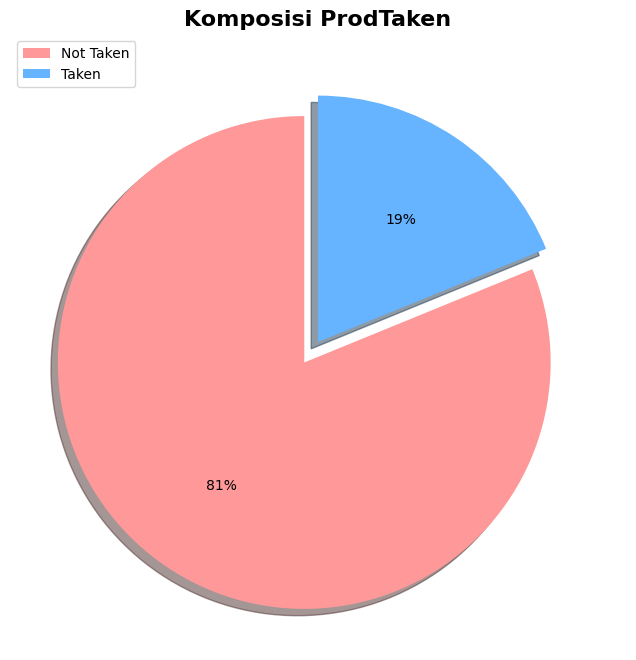

In [ ]:
plt.figure(figsize=(8, 8))

# Data
target_counts = df['ProdTaken'].value_counts()

# Mengatur variasi warna dan efek shadow
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# Pie chart
plt.pie(target_counts, autopct='%1.0f%%', startangle=90, explode=explode, colors=colors, shadow=True)

# Pengaturan lainnya
plt.title('Komposisi ProdTaken', fontsize=16, fontweight='bold')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

### Numerical

<Figure size 640x480 with 0 Axes>

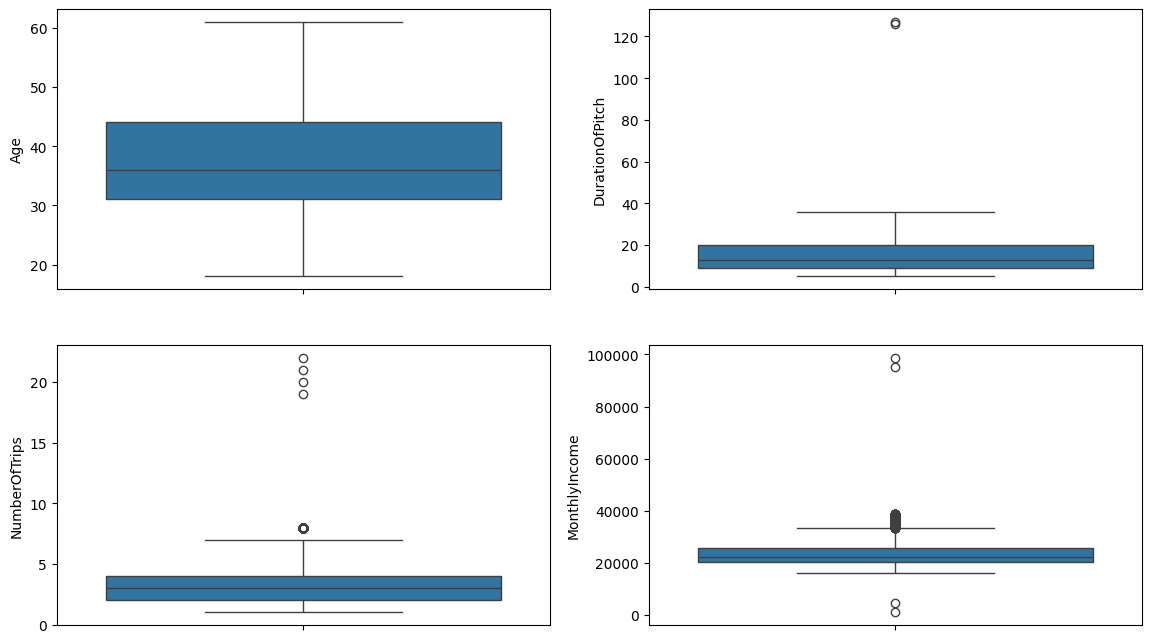

In [ ]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(num_cols) / 2))  # Calculate rows needed

plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i+1)  # Use calculated num_rows
    sns.boxplot(y=df[col])
    plt.ylabel(col)
plt.show()

<Figure size 640x480 with 0 Axes>

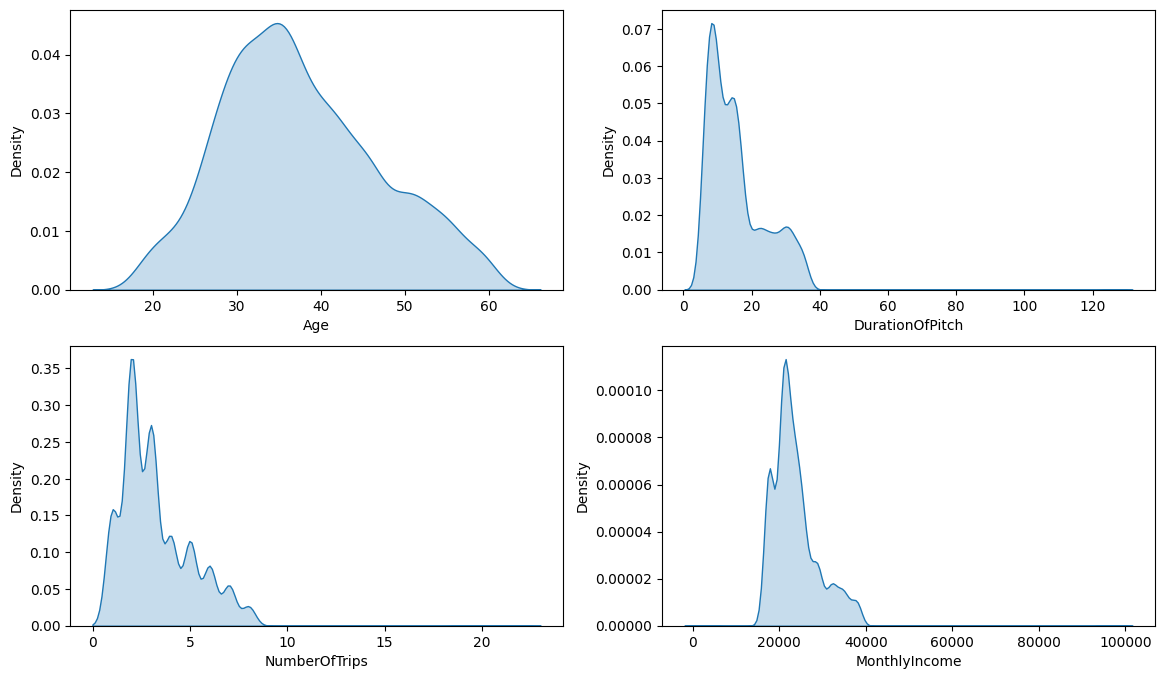

In [ ]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(num_cols) / 2))  # Calculate rows needed

plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i+1)  # Use calculated num_rows
    sns.kdeplot(data=df[col], shade=True)
    plt.xlabel(col)
plt.show()

In [ ]:
# Check tingkat kemiringan distribusi data numerik dengan skewness score
for i in range(0, len(num_cols)):
    print(f"Skewness {df[num_cols].columns[i]} : {df[num_cols[i]].skew()}")

Skewness Age : 0.38298868373855377
Skewness DurationOfPitch : 1.7520370490349106
Skewness NumberOfTrips : 1.4538837843258117
Skewness MonthlyIncome : 1.949159831766865


Kesimpulan:

- Kolom CustomerID memiliki sebaran data yang terlalu banyak sehingga kolom tersebut bisa dihapus nantinya.
- Kolom Age memiliki distribusi yang hampir normal.
- Kolom DurationOfPitch, NumberOfTrips, dan MonthlyIncome sepertinya memiliki distribusi data positive skewed yang mengindikasikan terdapat outlier.
- kolom lain yang sisanya termasuk jenis data diskrit atau ordinal.

### Numerical but Categorical

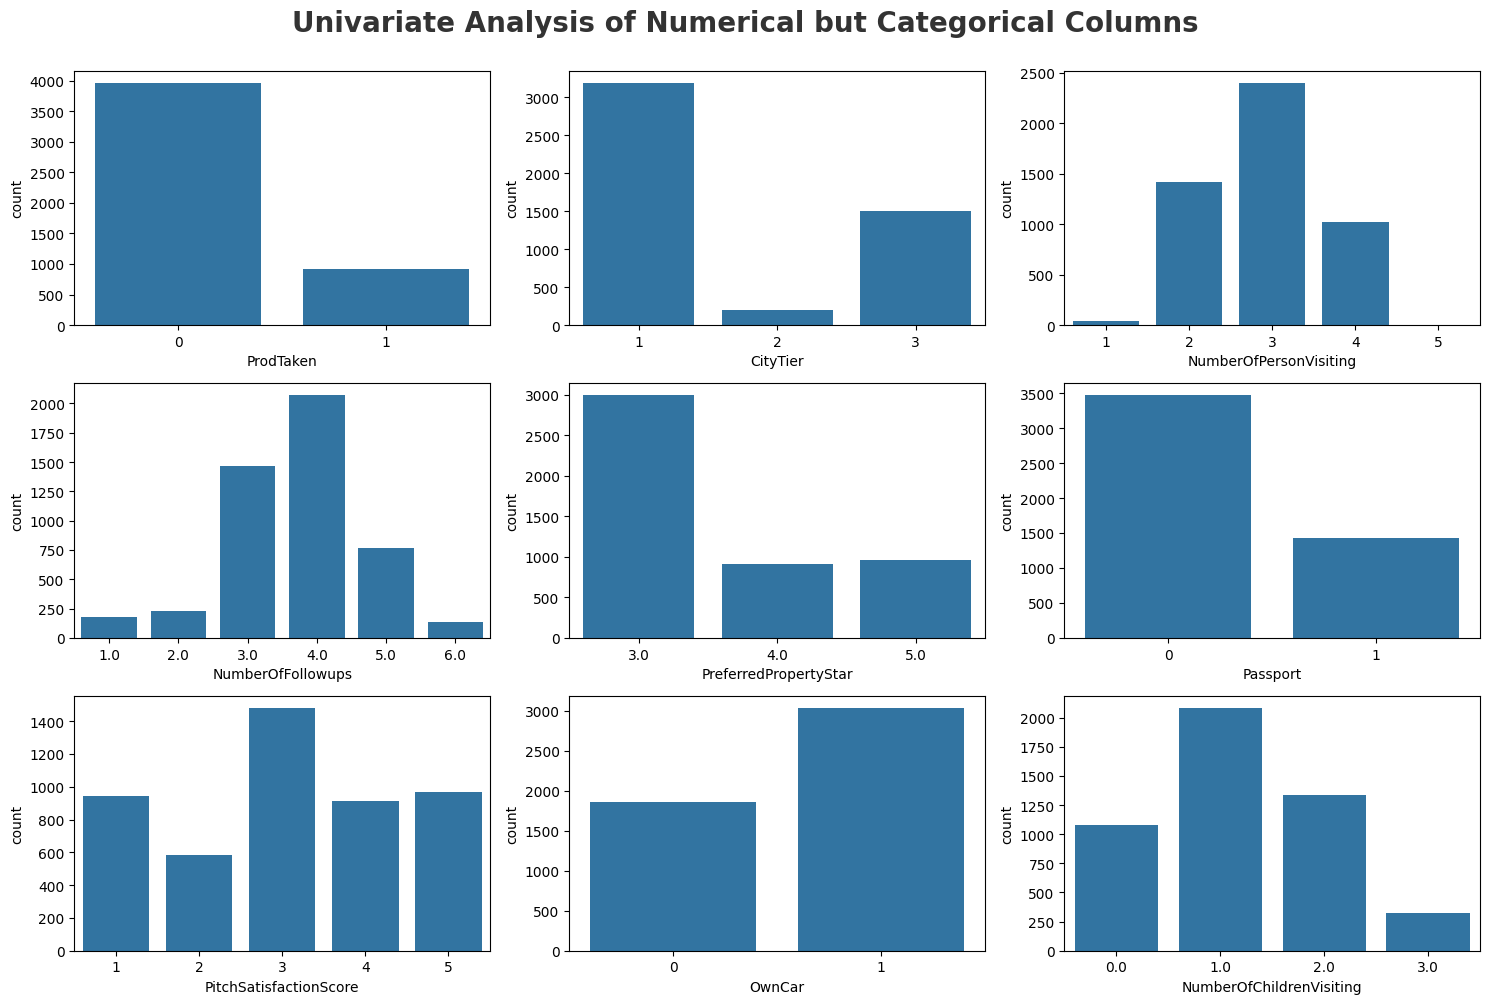

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical but Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(num_but_cat) / 3)) # Calculate rows needed based on the number of num_but_cat columns

for i in range(0, len(num_but_cat)): # Iterate over the correct list
    plt.subplot(num_rows, 3, i+1) # Use calculated num_rows and 3 columns
    sns.countplot(x=df[num_but_cat[i]]) # Use countplot for categorical data

plt.tight_layout()
plt.show()

### Categorical

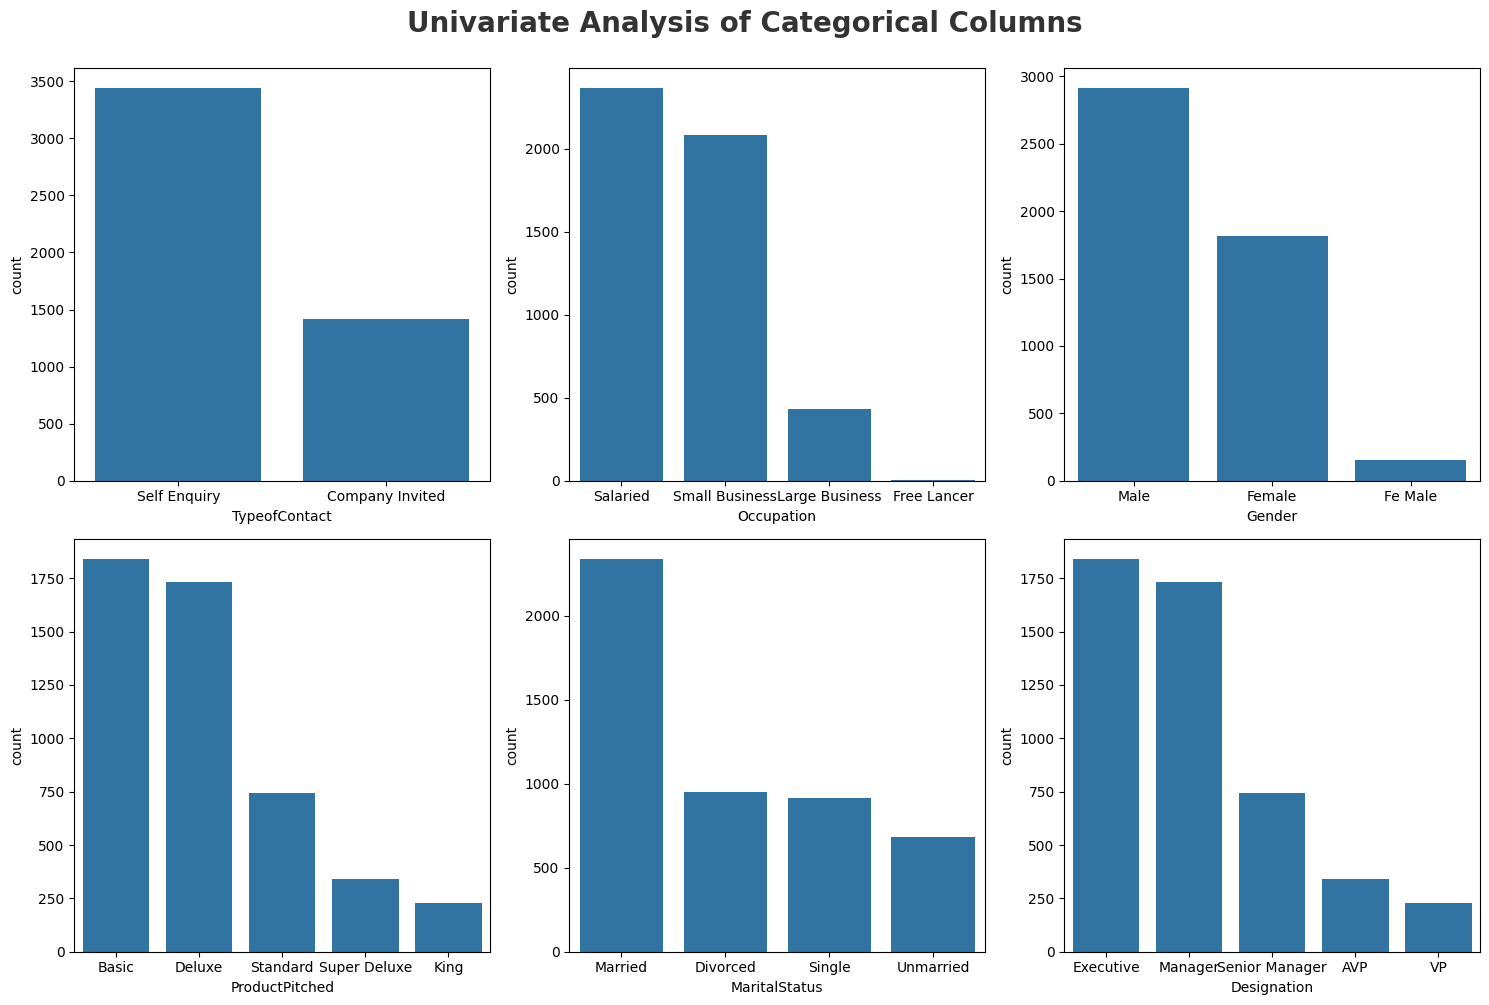

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Calculate the number of rows needed
num_rows = int(np.ceil(len(cat_cols) / 3))

for i in range(0, len(cat_cols)):
    plt.subplot(num_rows, 3, i+1) # Use num_rows to create enough subplots
    sns.barplot(x=df[cat_cols[i]].value_counts().index, y=df[cat_cols[i]].value_counts())

plt.tight_layout()
plt.show()

## Bivariate Analysis

In [ ]:
# variable untuk melihat korelasi dengan fitur target
df_numeric = df[num_cols + ['ProdTaken']]
df_numeric_cat = df[num_but_cat]
df_cat_prodtaken = df[cat_cols + ['ProdTaken']]

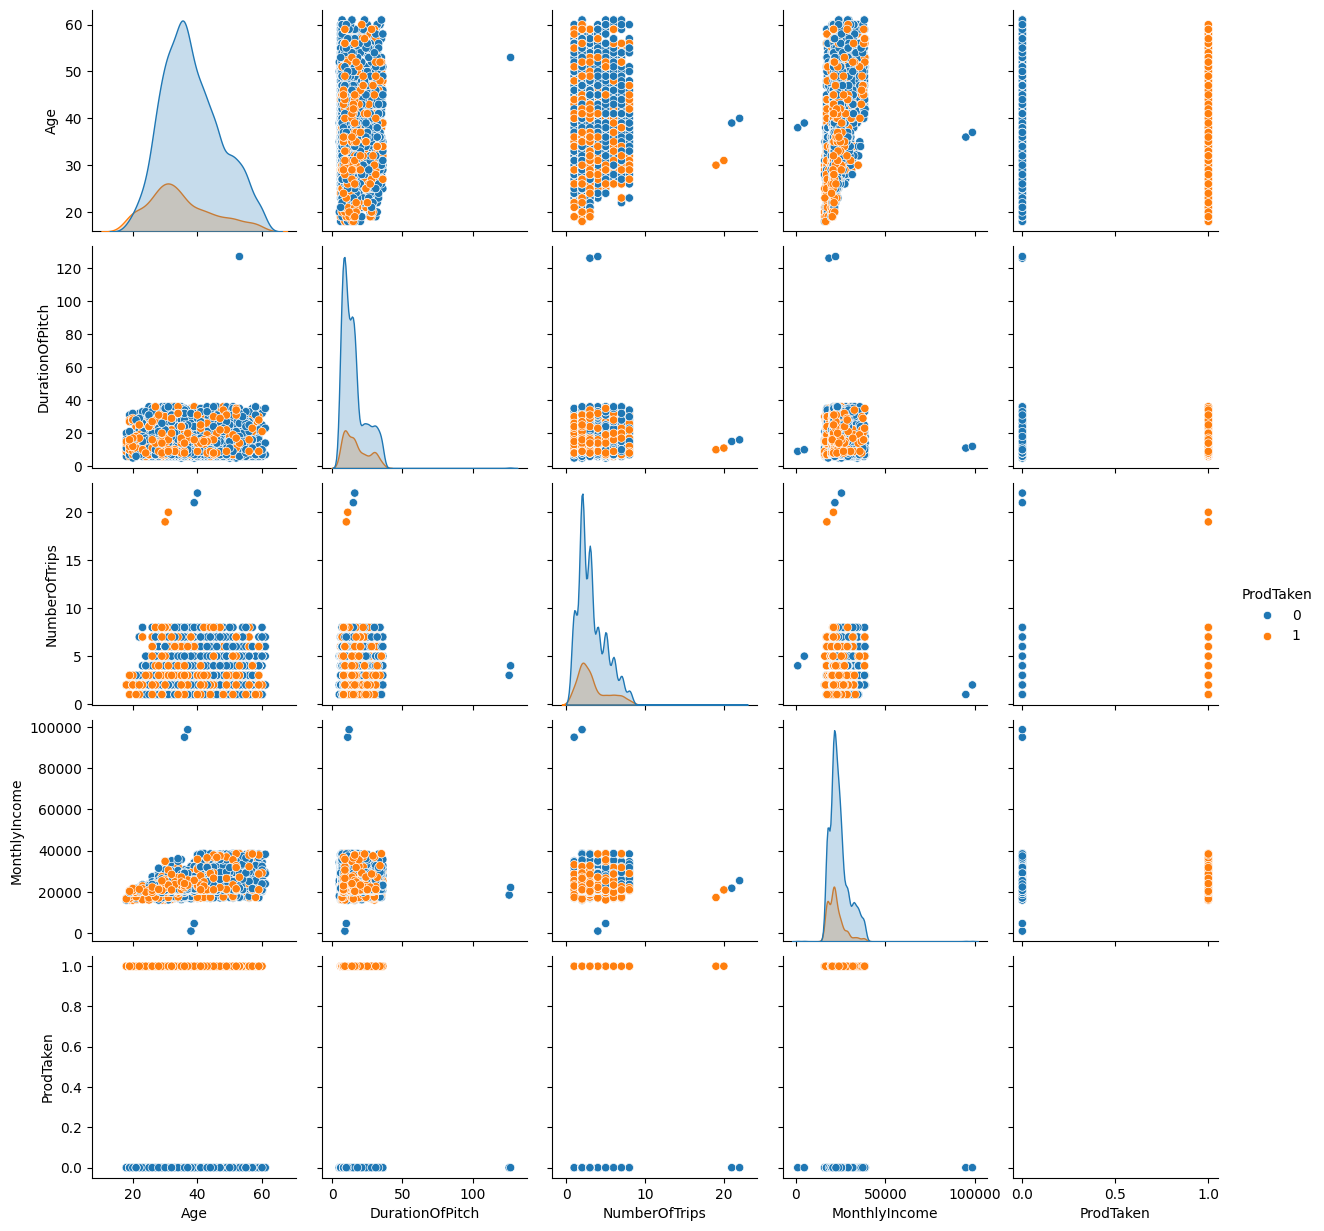

In [ ]:
sns.pairplot(df, hue='ProdTaken', vars=df_numeric)
plt.show()

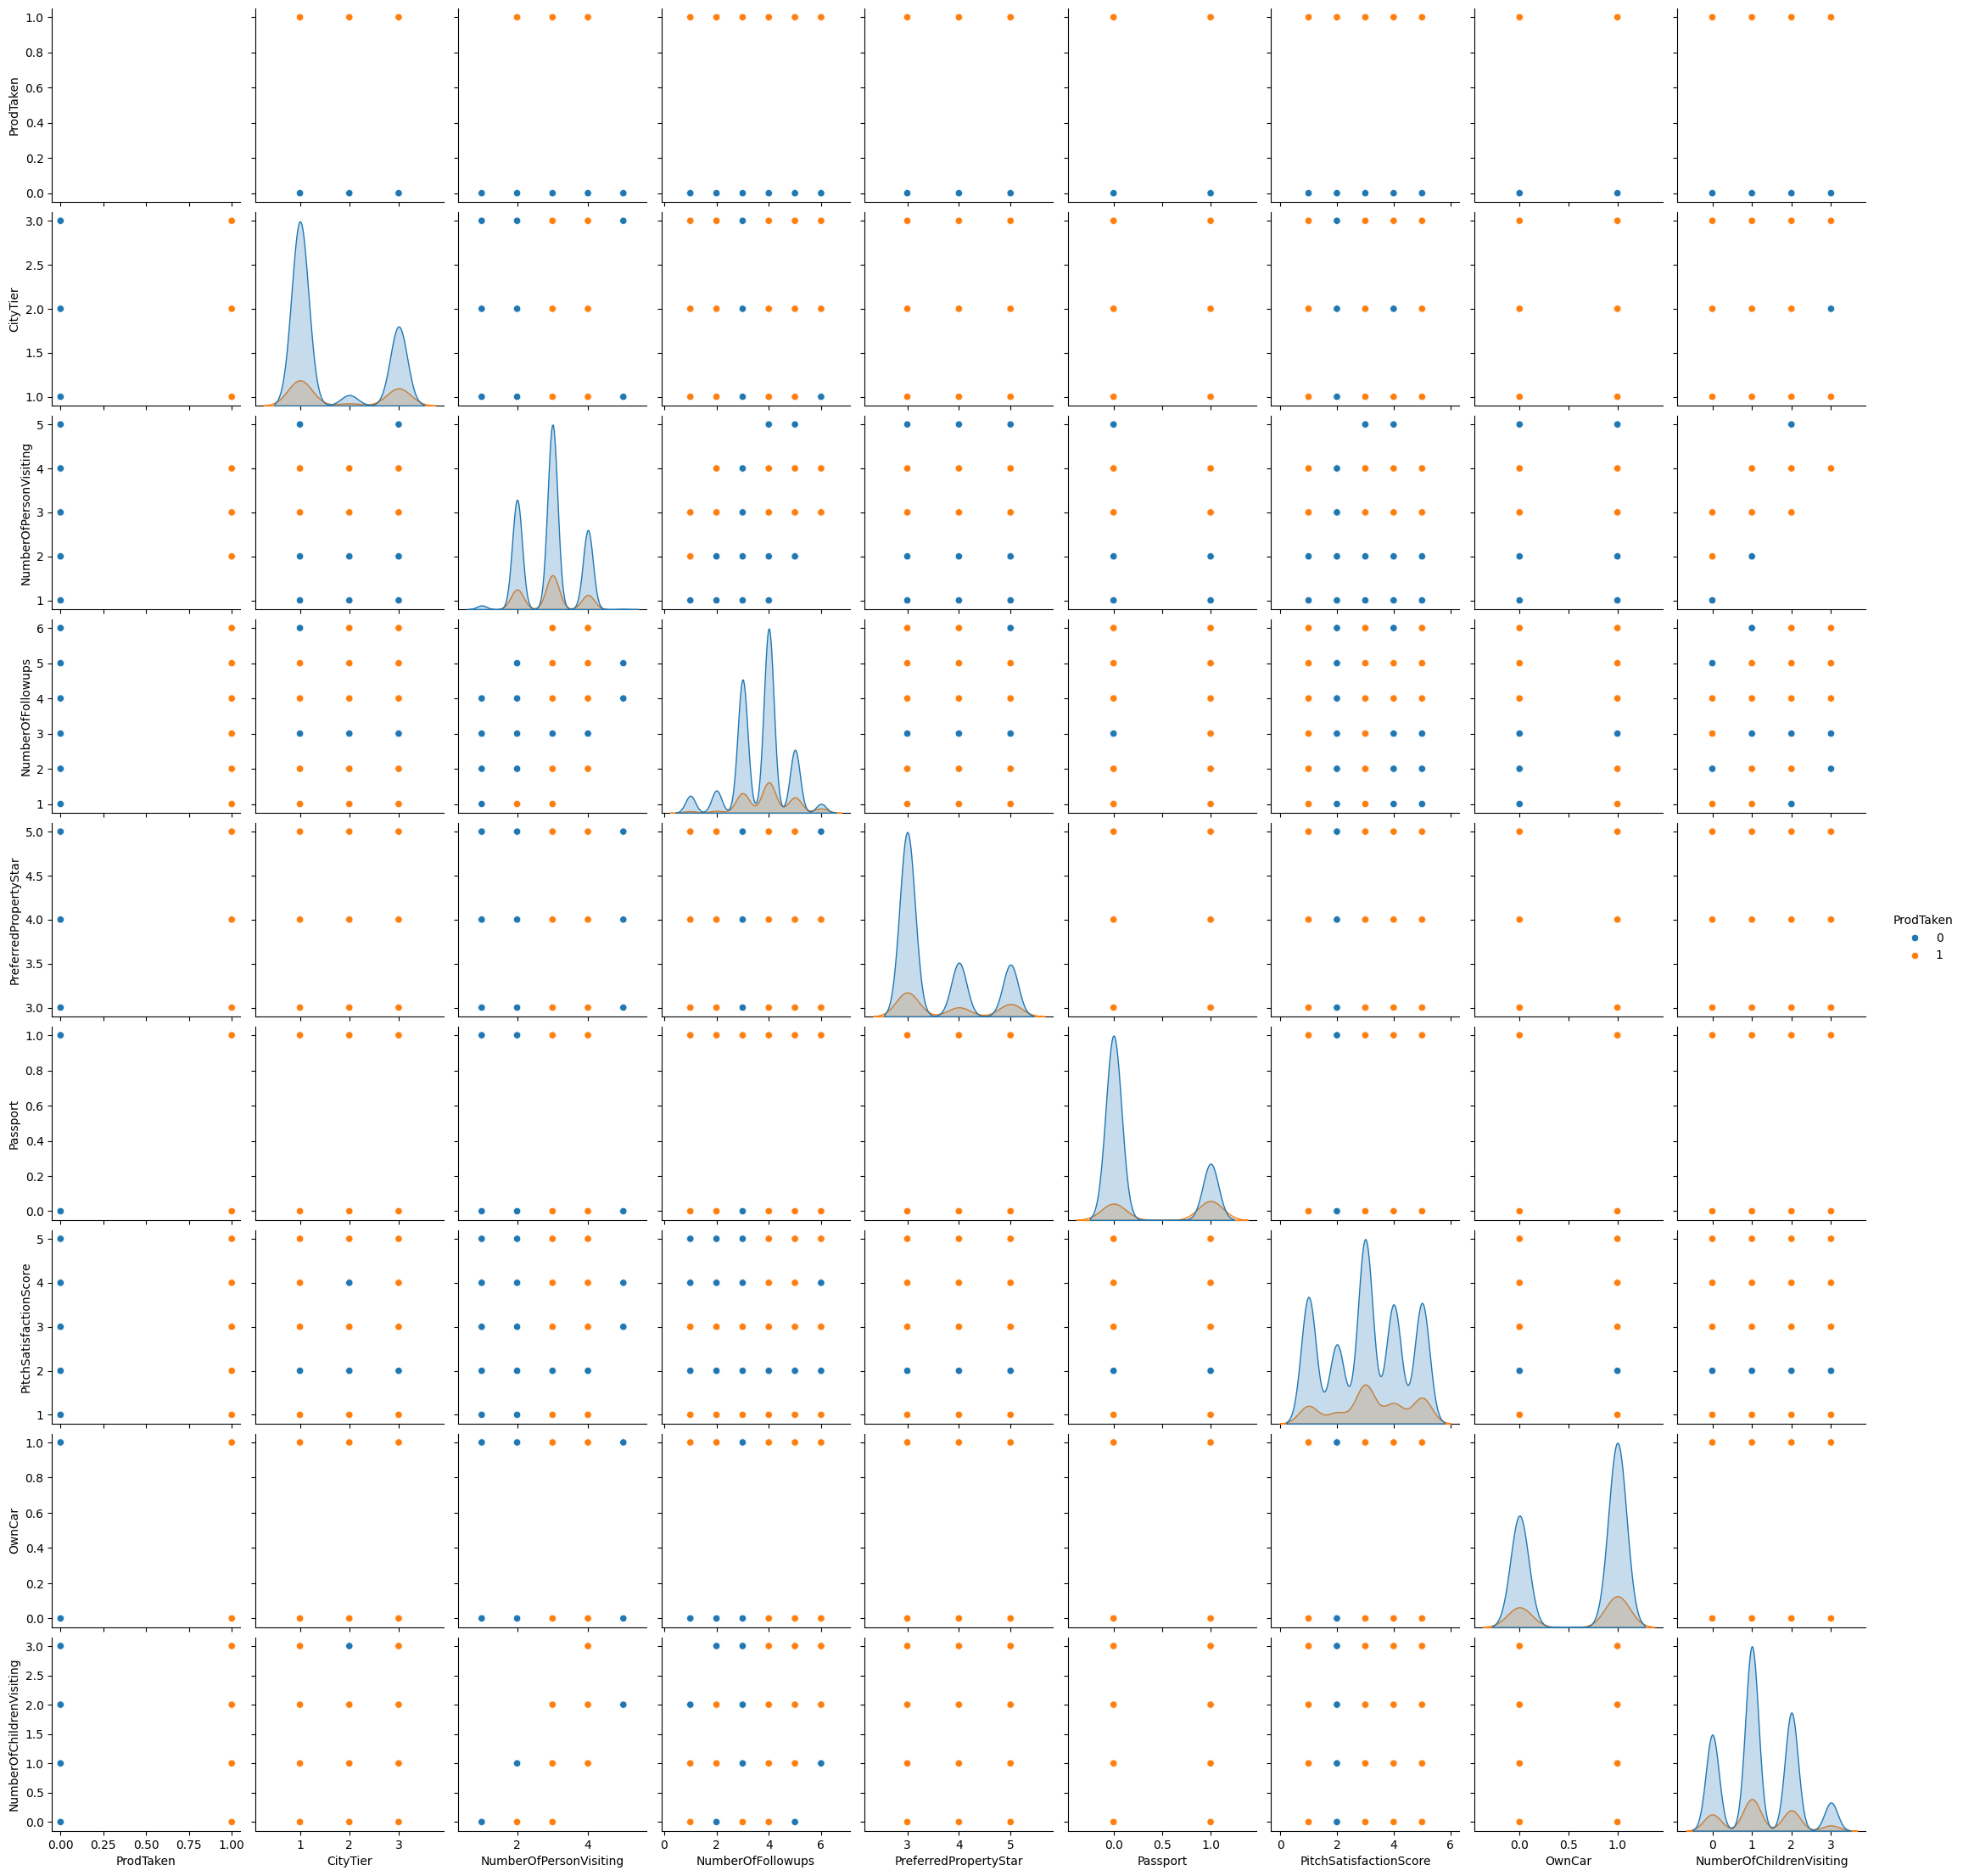

In [ ]:
sns.pairplot(df, hue='ProdTaken', vars=df_numeric_cat)
plt.show()

In [ ]:
# sns.pairplot(df, hue='ProdTaken', vars=df_cat_prodtaken)
# plt.show()

In [ ]:
# sns.pairplot(df, hue='ProdTaken', vars=num_cols)
# plt.show()


In [ ]:
# sns.pairplot(df, hue='ProdTaken', vars=num_but_cat)
# plt.show()


In [ ]:
# import seaborn as sns # Import the seaborn library and alias it as 'sns'
# import matplotlib.pyplot as plt

# sns.pairplot(df, hue='ProdTaken')
# plt.show()

### Numerical Columns Vs ProdTaken

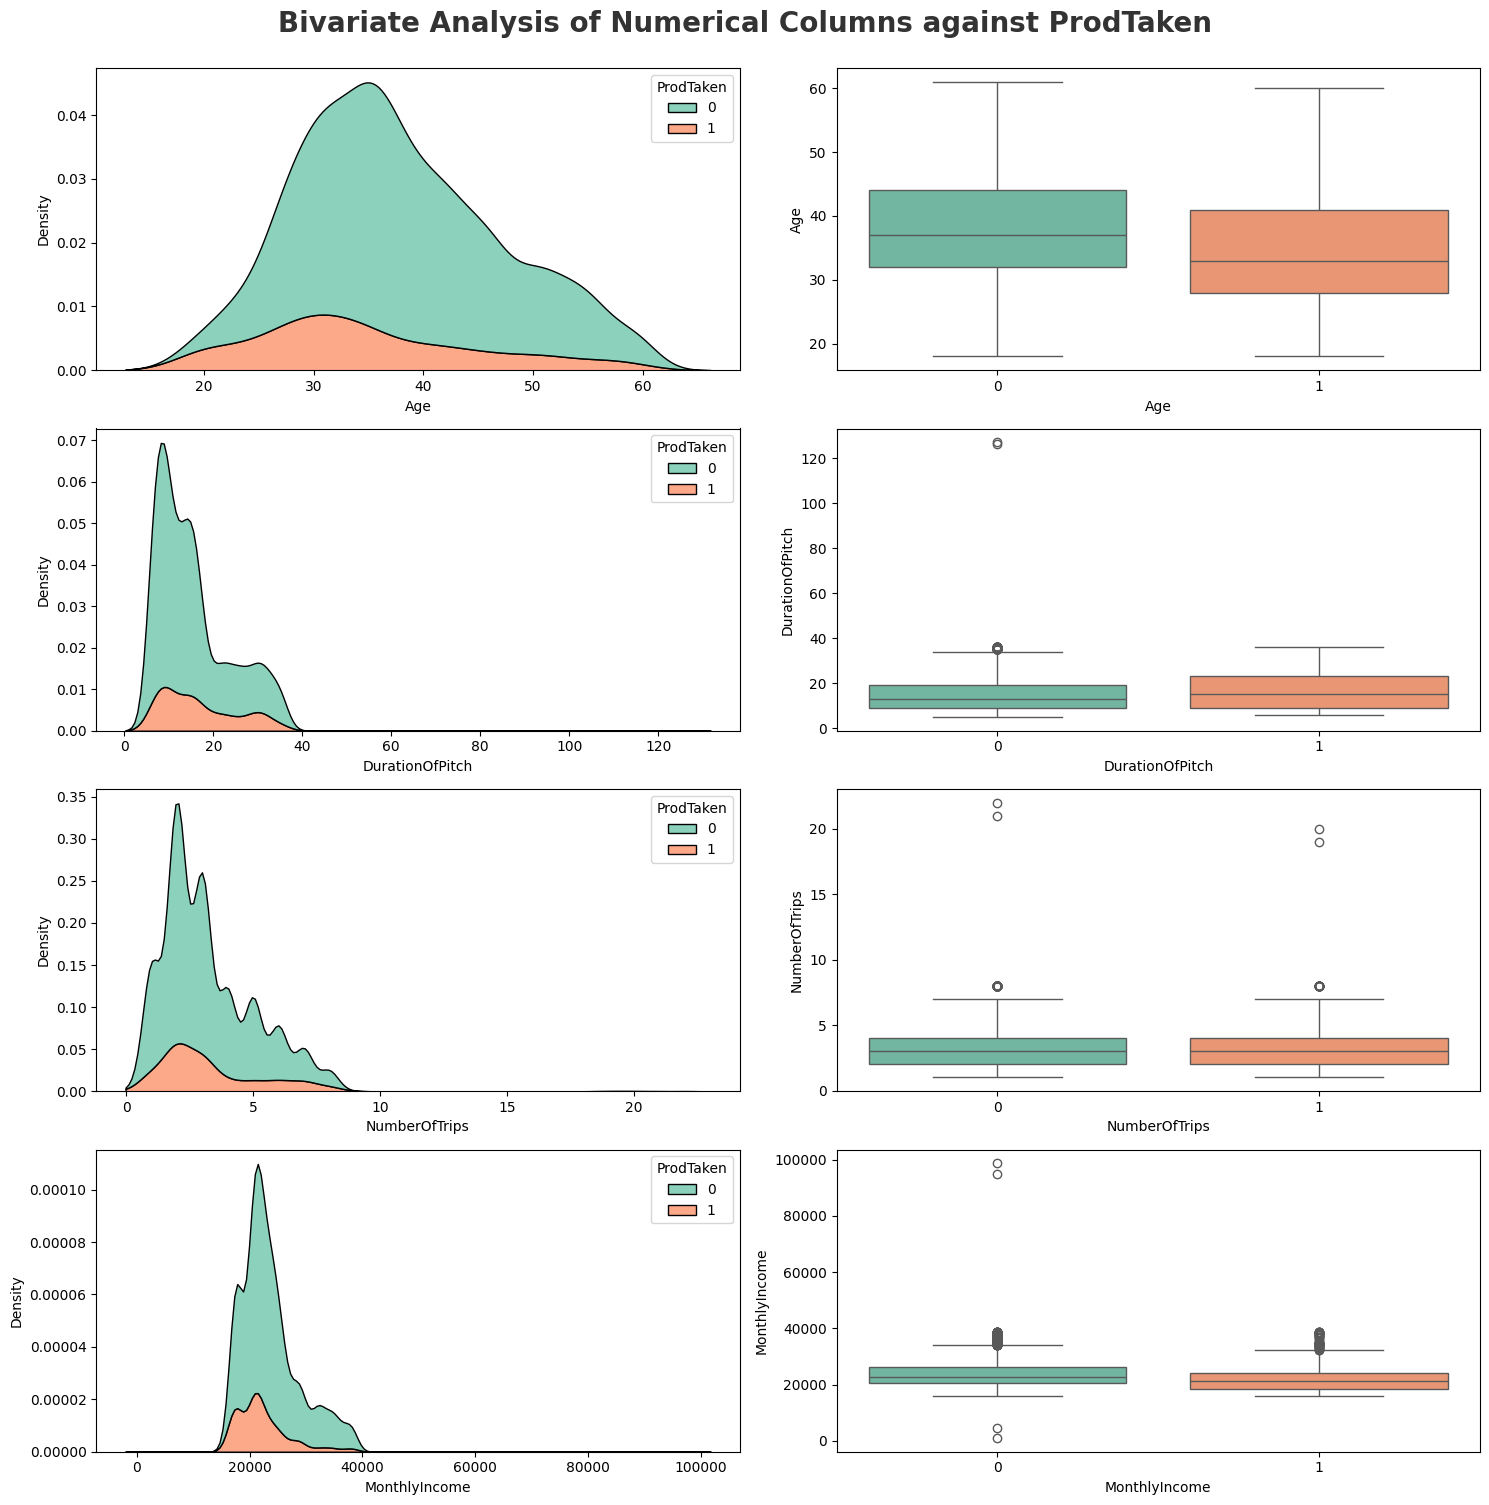

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Columns against ProdTaken', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE dan Box plot untuk setiap kolom numerikal dengan target 'ProdTaken'
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, 2*i+1)
    sns.kdeplot(data=df, x=col, hue='ProdTaken', fill=True, multiple='stack', palette='Set2')
    plt.xlabel(col)

    plt.subplot(4, 2, 2*i+2)
    sns.boxplot(data=df, x='ProdTaken', y=col, palette='Set2')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi diatas dapat disimpulkan bahwa:
- Umur customer yang membeli paket perjalanan berada pada retang 29-40 tahun
- Duration of pitch yang dilakukan sales selama kurang dari 20 menit akan meningkatkan kemungkinan customer mengambil paket perjalanan
- Customer dengan pendapatan bulanan sekitar 15000-25000 berkemungkinan lebih tertarik untuk membeli paket perjalanan
Customer yang membeli paket perjalanan tidak melelati lebih dari 5 kali perjalanan dalam satu tahun

In [ ]:
from scipy import stats
import pandas as pd

features = num_cols  # Asumsikan num adalah list nama fitur numerik yang ingin diuji

results = []  # List untuk menyimpan hasil t-test

for feature in features:
    prod_taken_0 = df[df['ProdTaken'] == 0][feature]
    prod_taken_1 = df[df['ProdTaken'] == 1][feature]

    t_stat, p_value = stats.ttest_ind(prod_taken_0.dropna(), prod_taken_1.dropna())

    # Menentukan hasil uji t-test
    if p_value < 0.05:
        hypothesis = f"H1 diterima: Ada perbedaan signifikan"
    else:
        hypothesis = "H0 diterima: Tidak cukup bukti untuk menolak hipotesis nol"

    results.append([feature, t_stat, p_value, hypothesis])

# Membuat DataFrame dari hasil t-test
result_df = pd.DataFrame(results, columns=['Feature', 't-statistic', 'p-value', 'Hypothesis Result'])
result_df

,Feature,t-statistic,p-value,Hypothesis Result
0,Age,10.162969,5.155096e-24,H1 diterima: Ada perbedaan signifikan
1,DurationOfPitch,-5.344214,9.516584e-08,H1 diterima: Ada perbedaan signifikan
2,NumberOfTrips,-1.302106,1.929435e-01,H0 diterima: Tidak cukup bukti untuk menolak h...
3,MonthlyIncome,8.984508,3.705260e-19,H1 diterima: Ada perbedaan signifikan


dari hasil uji t-test

Age: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa usia dapat memainkan peran penting dalam keputusan pembelian.

DurationOfPitch: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini mengindikasikan bahwa durasi presentasi memiliki pengaruh yang signifikan terhadap keputusan pembelian.

NumberOfTrips: Tidak cukup bukti untuk menolak hipotesis nol, yang berarti tidak ada perbedaan signifikan antara grup 'ProdTaken' terkait dengan jumlah perjalanan.

MonthlyIncome: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa pendapatan bulanan dapat memiliki pengaruh yang signifikan terhadap keputusan pembelian.

### Categorical Columns Vs ProdTaken

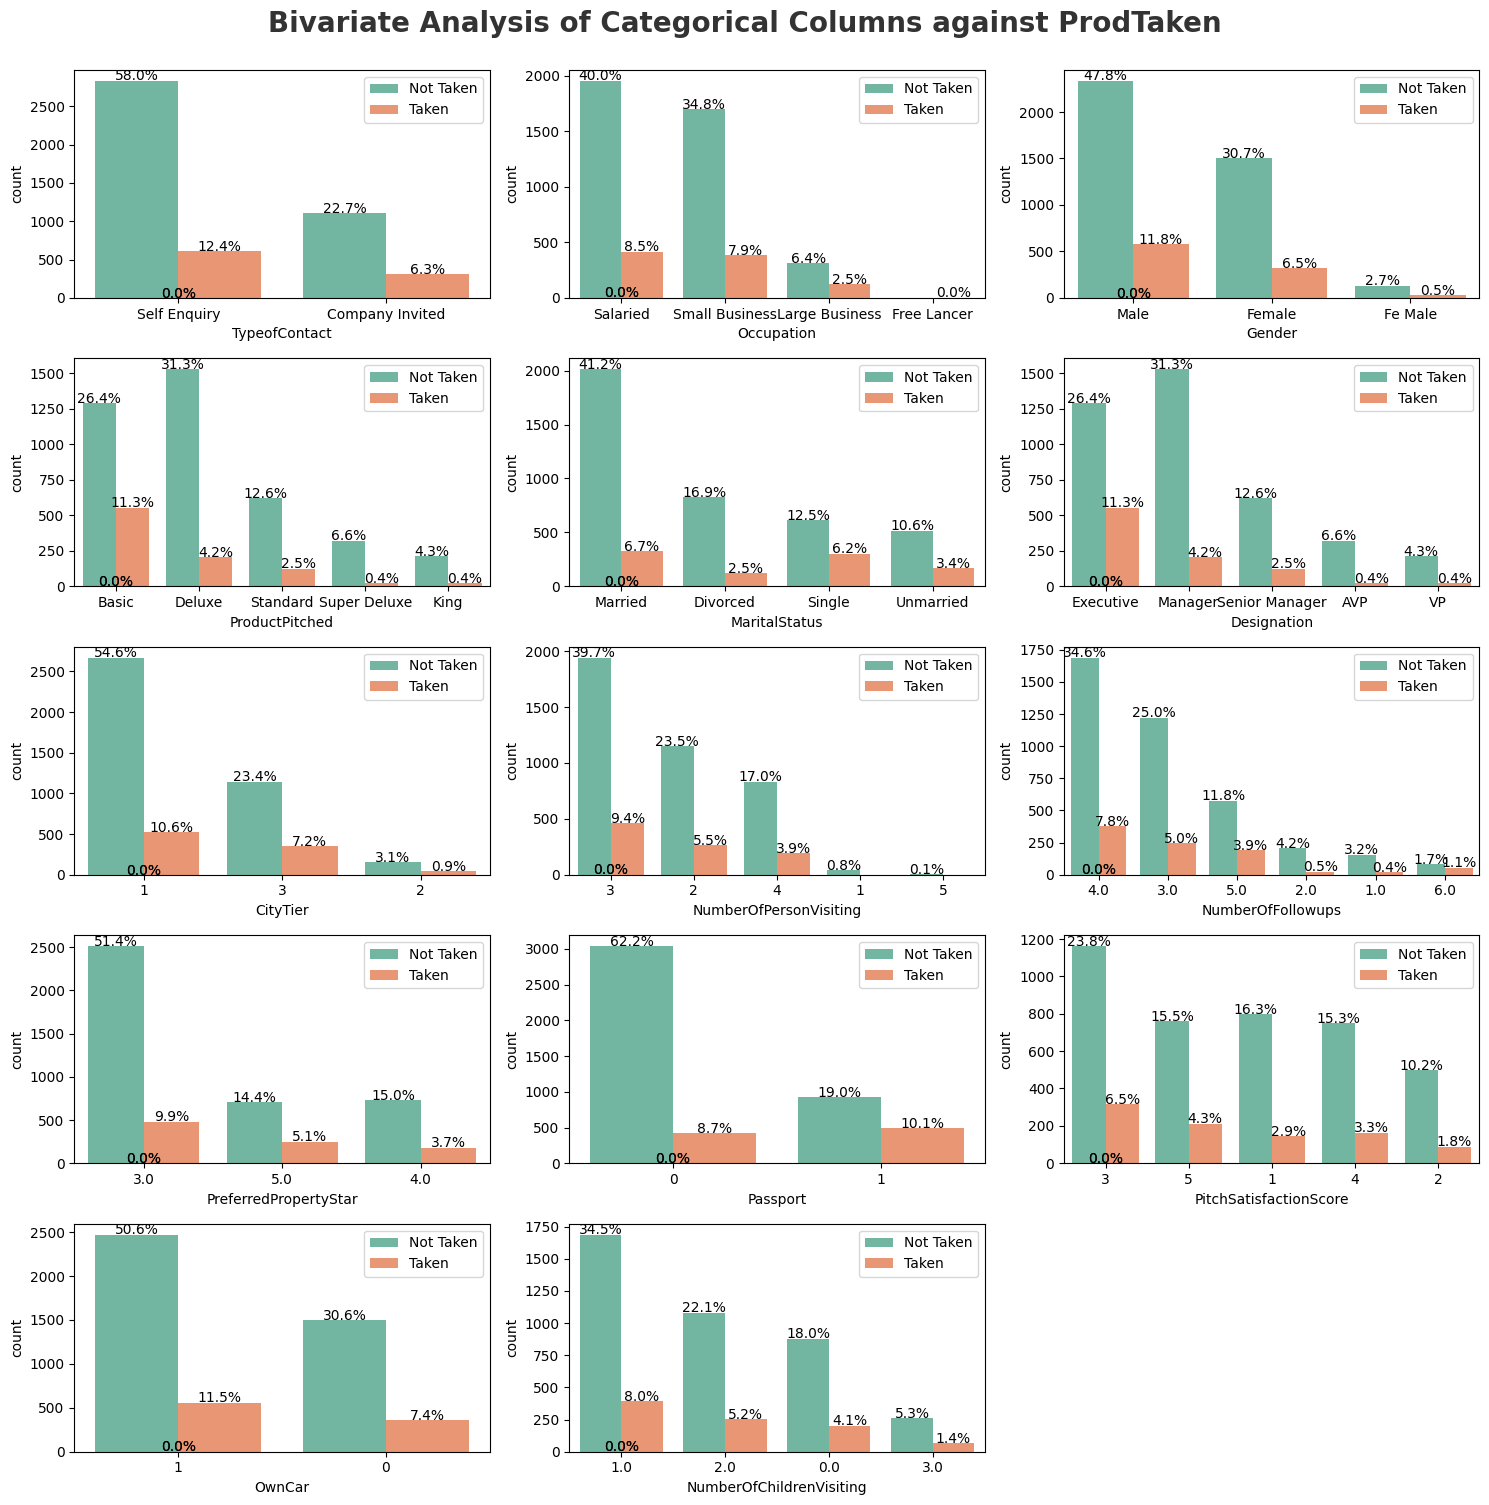

In [ ]:
cat = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
       'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']

plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Categorical Columns against ProdTaken', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat)):
    plt.subplot(5, 3, i+1)
    sorted_vals = df[cat[i]].value_counts().index
    ax = sns.countplot(x=df[cat[i]], hue=df['ProdTaken'], order=sorted_vals, palette='Set2')

    # Menambahkan teks persentase di atas setiap bar
    total = len(df[cat[i]])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 3, f'{height/total:.1%}', ha='center')

    plt.legend(['Not Taken', 'Taken'])

plt.tight_layout()
plt.show()

Berdasarkan Visualisasi diatas dapat disimpulkan bahwa:
- Customer dengan tipe kontrak Self Enquiry membeli paket lebih banyak daripada customer dengan tipe kontrak Company Invited
- Customer yang berada di city tier 3 memiliki persentase pembelian paket lebih tinggi setelah ditawarkan oleh sales
- Customer dengan Occupation Salaried dan Small Business memiliki ketertarikan untuk membeli paket yang ditawarkan
- Customer dengan gender Male lebih banyak mengambil paket yang ditawarkan daripada female atau fe male
- Distribusi jumlah orang yang ikut dalam perjalanan dengan customer yang mengambil penawaran paket travel paling banyak adalah 3 orang
- Customner yang di-follow up antara 3-5 kali lebih banyak yang mengambil penawaran travel dibandingkan dengan yang ditawarkan kurang dari 3 kali atau lebih dari 5 kali
- Product basic yang ditawarkan oleh sales lebih banyak diambil daripada produk lainnya
- Customer yang menerima penawaran paket travel lebih banyak memilih property bintang tiga dibanding bintang empat dan lima
- Customer dengan status single atau unmarried lebih banyak menerima penawaran paket travel
- Customer yang memiliki passport memiliki persentase menerima penawaran paket travel lebih tinggi daripada yang tidak memiliki passport
- Customer yang memberikan score kepuasan >=3 lebih banyak membeli paket perjalanan.
- Customer yang memiliki mobil lebih banyak menerima penawaran paket travel
- Customer dengan jumlah anak 1 lebih banyak menerima penawaran paket travel
- Customer dengan jabatan Executive lebih banyak menerima penawaran paket travel

In [ ]:
#Uji Hipotesis menggunakan chisquare pada kolom kategorikal terhadap target
#H0 : Tidak berkorelasi dengan target
#H1 : Berkorelasi dengan target
from scipy.stats import chi2_contingency

chi2_check = []
for i in cat:  # Menggunakan variabel 'cat' yang merupakan list nama kolom kategorikal
    contingency_table = pd.crosstab(df['ProdTaken'], df[i])
    p_value = chi2_contingency(contingency_table)[1]

    if p_value < 0.05:
        chi2_check.append('H1 diterima: Berkorelasi dengan target')
    else:
        chi2_check.append('H0 diterima: Tidak berkorelasi dengan target')

result = pd.DataFrame(data=[cat, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,H1 diterima: Berkorelasi dengan target
1,Occupation,H1 diterima: Berkorelasi dengan target
2,Gender,H0 diterima: Tidak berkorelasi dengan target
3,ProductPitched,H1 diterima: Berkorelasi dengan target
4,MaritalStatus,H1 diterima: Berkorelasi dengan target
5,Designation,H1 diterima: Berkorelasi dengan target
6,CityTier,H1 diterima: Berkorelasi dengan target
7,NumberOfPersonVisiting,H1 diterima: Berkorelasi dengan target
8,NumberOfFollowups,H1 diterima: Berkorelasi dengan target
9,PreferredPropertyStar,H1 diterima: Berkorelasi dengan target


Berdasarkan uji hipotesis diatas dapat disimpulkan bahwa kolom `Gender`, `OwnCar`, dan `NumberOfChildrenVisiting` tidak akan dimasukkan kedalam feature karena tidak berkorelasi dengan target (`ProdTaken`)

## Multivariate Analysis

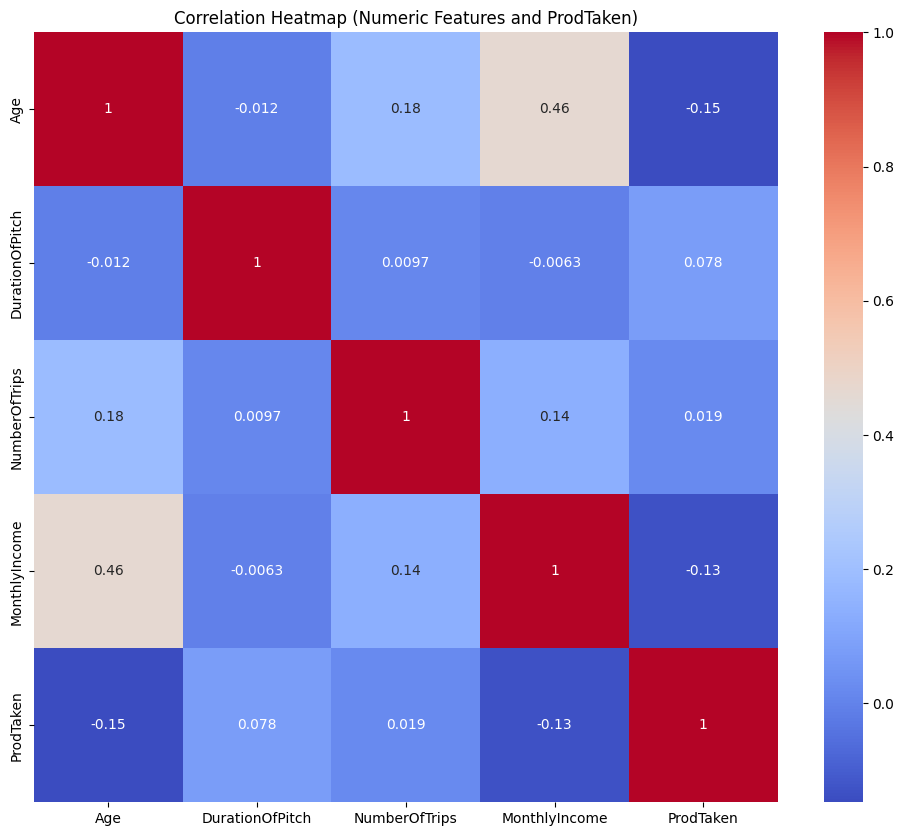

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' )
plt.title('Correlation Heatmap (Numeric Features and ProdTaken)')
plt.show()


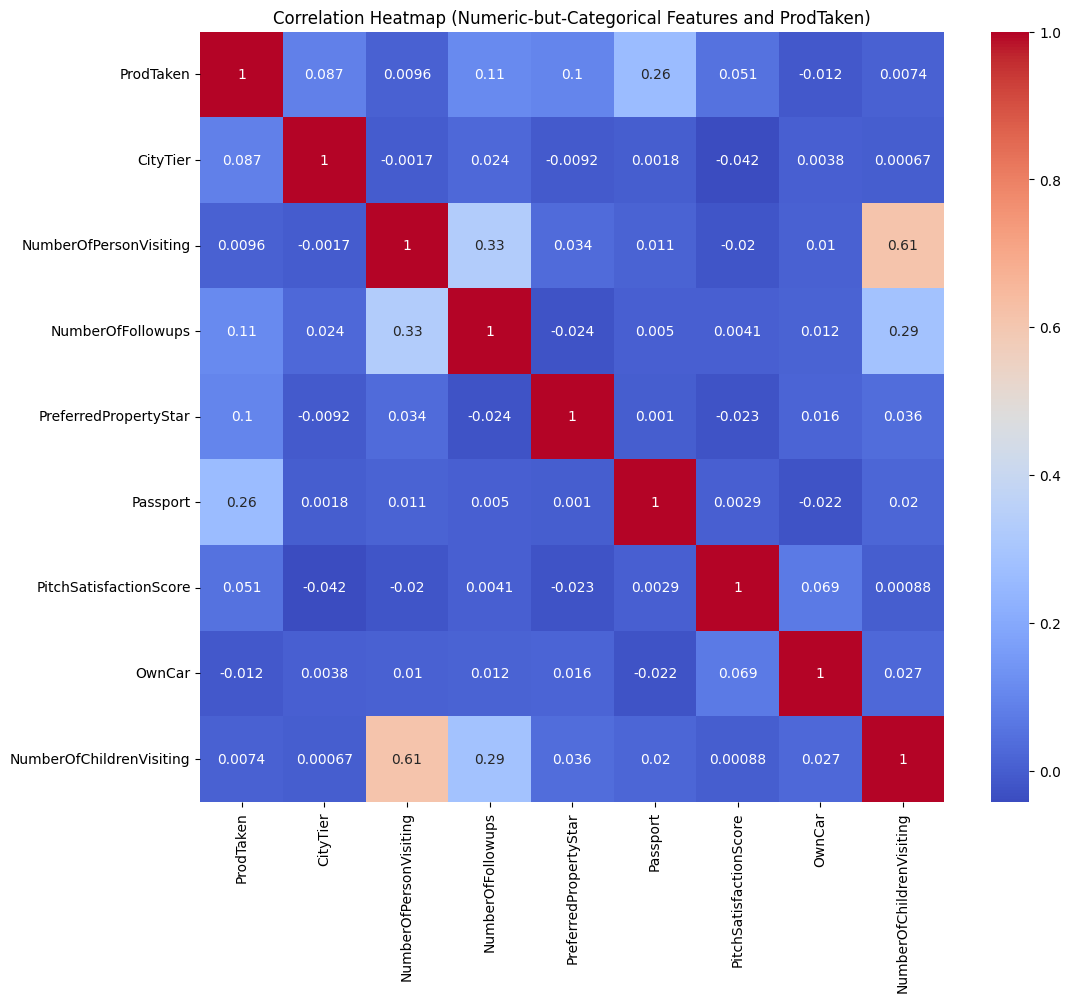

In [ ]:
correlation_matrix_num_cat = df_numeric_cat.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_num_cat, annot=True, cmap='coolwarm' )
plt.title('Correlation Heatmap (Numeric-but-Categorical Features and ProdTaken)')
plt.show()


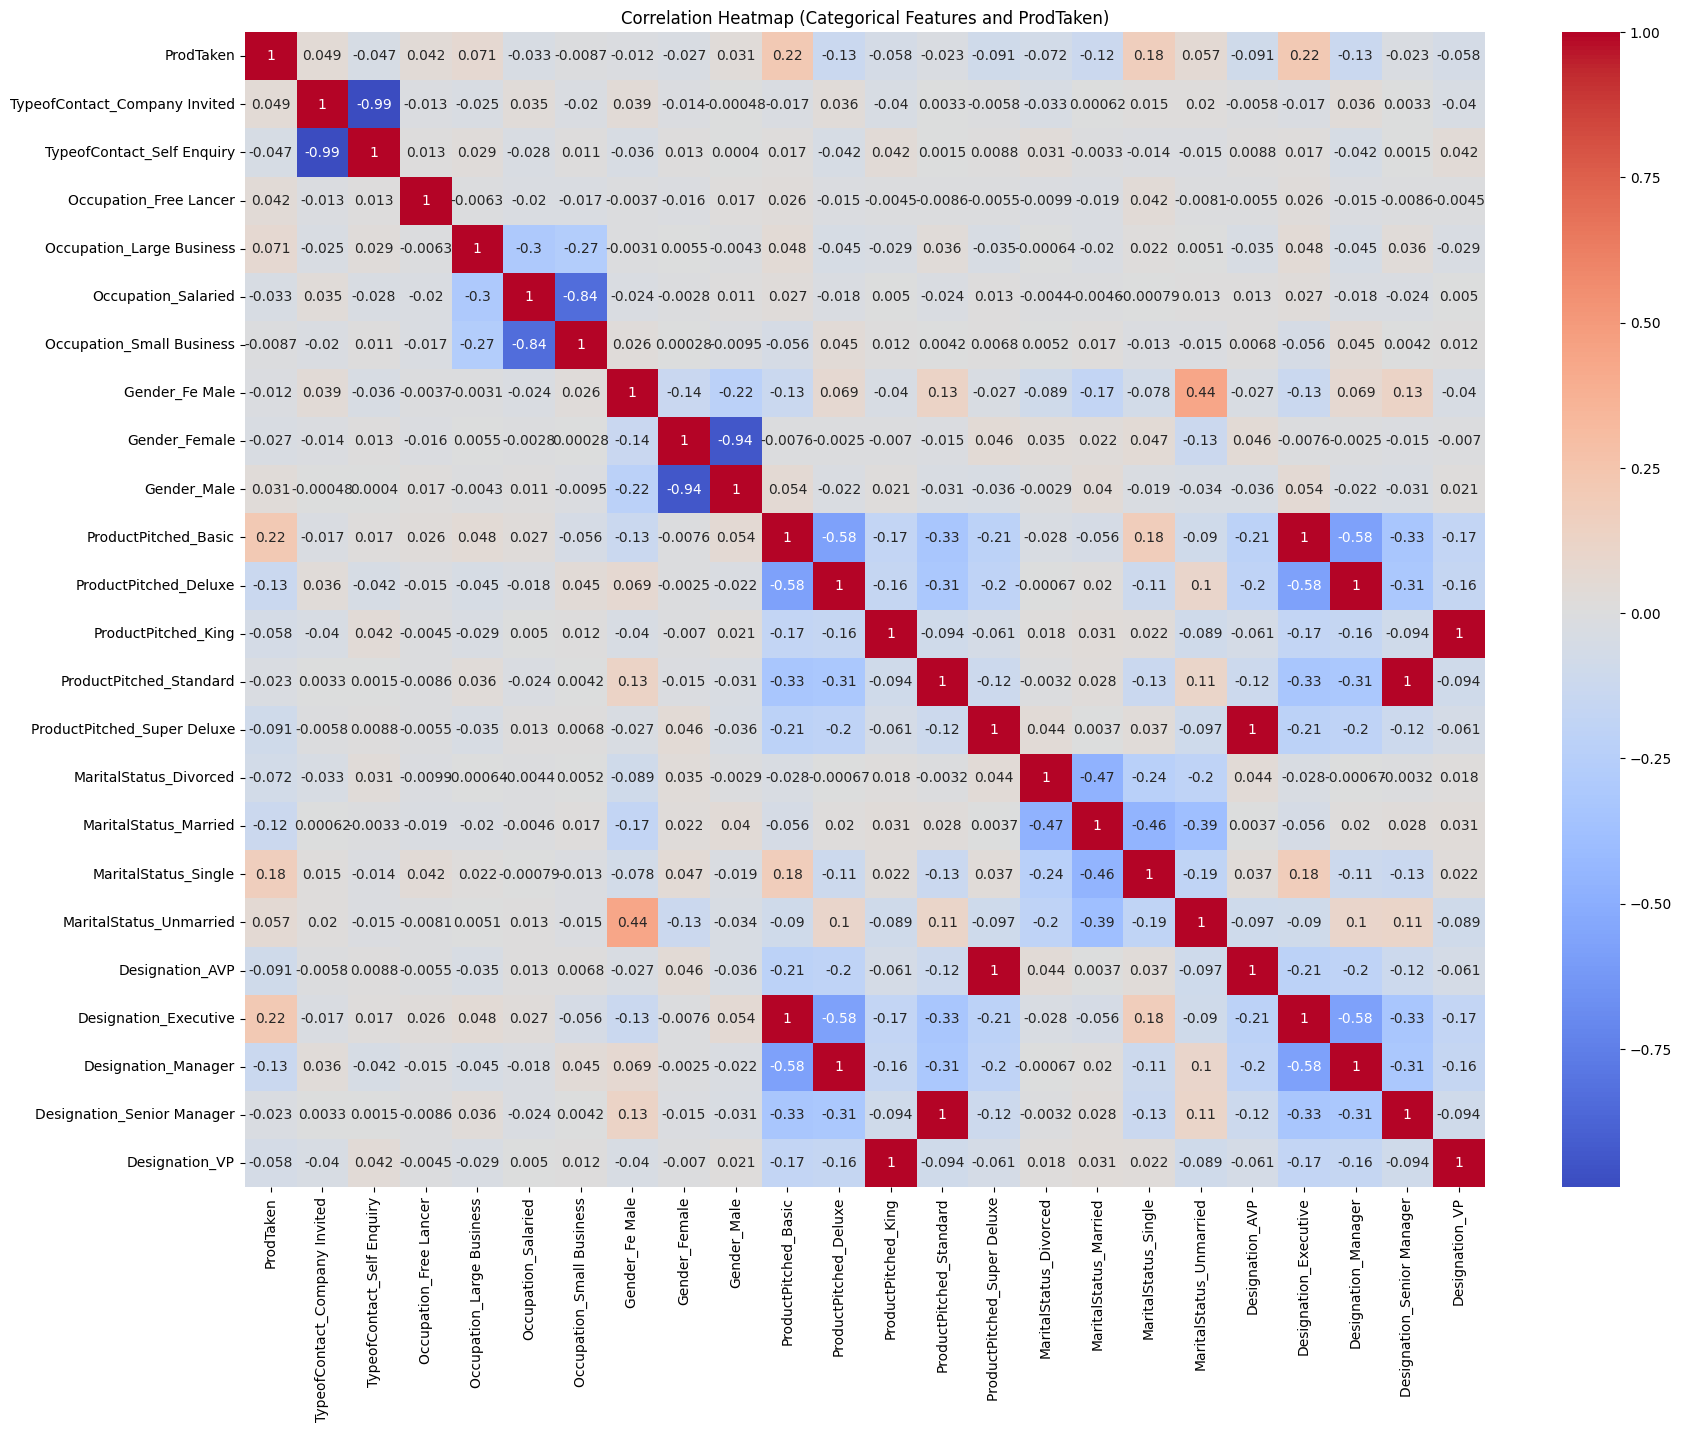

In [ ]:
# Convert categorical features to numerical using one-hot encoding
df_cat_prodtaken_encoded = pd.get_dummies(df_cat_prodtaken, columns=cat_cols)

# Calculate the correlation matrix
correlation_matrix_cat = df_cat_prodtaken_encoded.corr()

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_cat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Categorical Features and ProdTaken)')
plt.show()


## Business Insights

In [ ]:
df_eda = df.copy()

#### Product mana yang diminati oleh pelanggan?

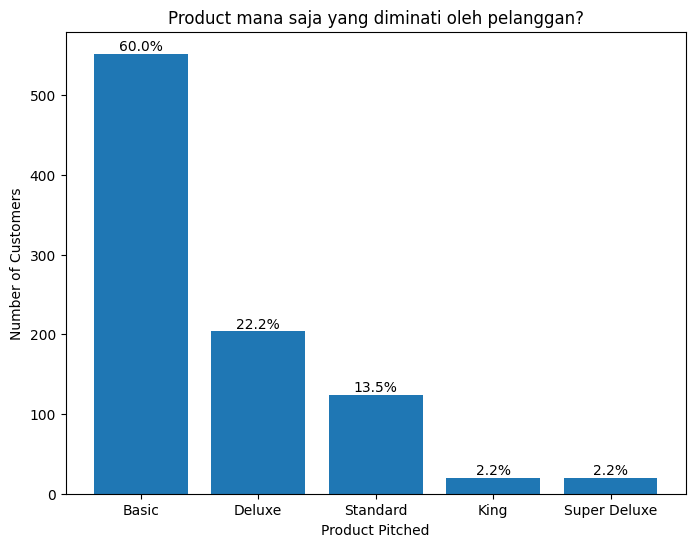

In [ ]:
# Filter data where ProdTaken is True
df_prod_taken = df[df['ProdTaken'] == 1]

# Count the occurrences of each product
product_counts = df_prod_taken['ProductPitched'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(product_counts.index, product_counts.values)
plt.xlabel('Product Pitched')
plt.ylabel('Number of Customers')
plt.title('Product mana saja yang diminati oleh pelanggan?')

# Add percentage labels to the bars
total_prod_taken = df_prod_taken.shape[0]
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_prod_taken) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

Dari diagram batang dapat dilihat bahwa 60% paket yang diambil tawarannya adalah pake Basic, kemudian Deluxe, Standard, serta Super Deluxe dan King.

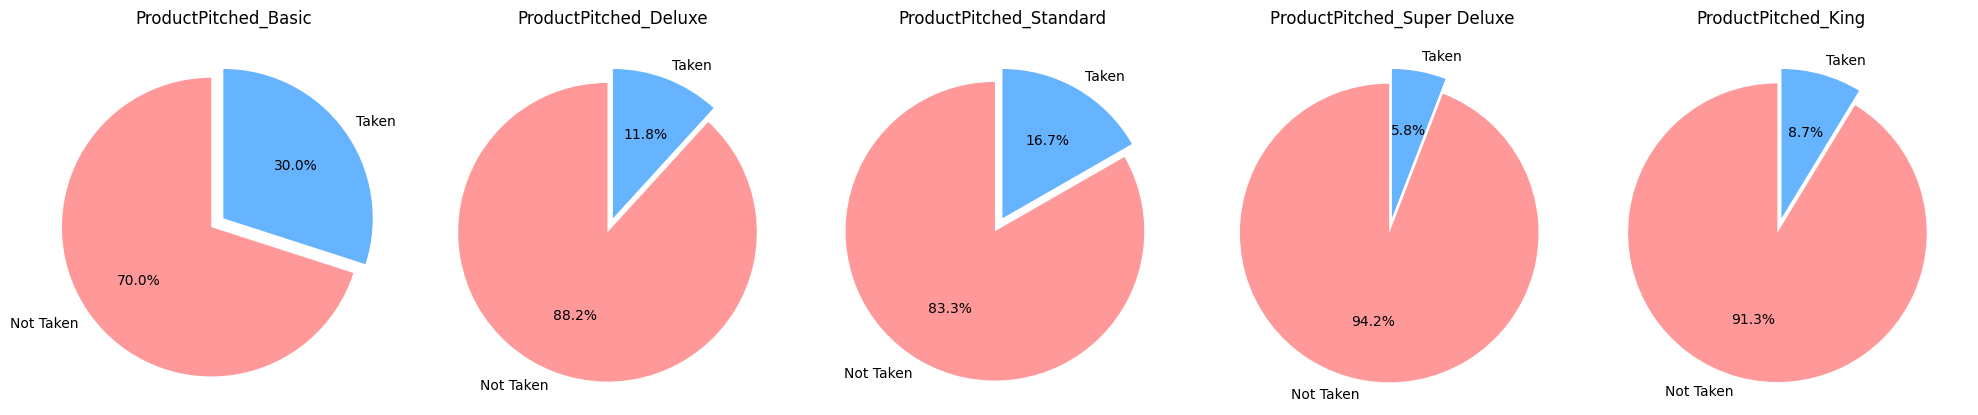

In [ ]:
# Filter data for each product
product_pitches = ['Basic', 'Deluxe', 'Standard', 'Super Deluxe', 'King']

plt.figure(figsize=(20, 5))  # Adjust figure size for better visualization

for i, product in enumerate(product_pitches):
  # Subplot for each product
  plt.subplot(1, 5, i + 1)

  # Filter data for the current product
  product_data = df[df['ProductPitched'] == product]['ProdTaken'].value_counts() # Filter based on the 'ProductPitched column directly

  # Create pie chart
  labels = ['Not Taken', 'Taken']
  sizes = product_data.values
  colors = ['#ff9999', '#66b3ff']
  explode = (0.1, 0)

  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
  plt.title(f'ProductPitched_{product}')

plt.tight_layout()
plt.show()

Jika ditelaah lebih dalam pada setiap paketnya, tetap lebih banyak paket Basic yang diambil setelah ditawarkan, kemudian paket standar, paket deluxe, paket king, dan terakhir adalah paket super deluxe.

Dalam presentase ini, harga paket bukanlah masalah utama seseorang dalam mengambil paket setelah ditawarkan asalkan sales dapat dengan tepat memilih segment pelanggan yang sesuaikan untuk di-pitch.


#### Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?

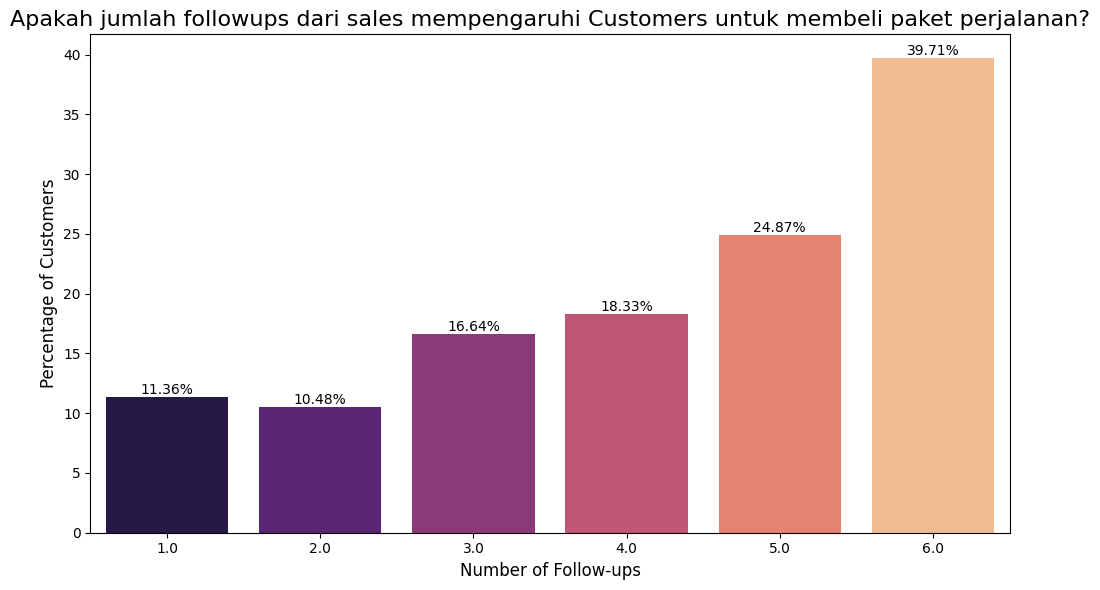

In [ ]:
total_customers = df_eda.groupby(['NumberOfFollowups', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomers')

# Menghitung persentase pelanggan yang mengambil produk
percentage_customers = round(df_eda.groupby(['NumberOfFollowups', 'ProdTaken'])['CustomerID'].count() / df_eda.groupby(['NumberOfFollowups'])['CustomerID'].count() * 100, 2)
percentage_customers = percentage_customers.reset_index(name='PercCust')

# Menggabungkan kedua DataFrame
df_followups = total_customers.merge(percentage_customers, on=['NumberOfFollowups', 'ProdTaken'])
df_followups = df_followups[df_followups.ProdTaken == 1].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfFollowups', y='PercCust', data=df_followups, palette='magma')

for idx, value in enumerate(df_followups['PercCust']):
    plt.text(idx, value, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Number of Follow-ups', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.title('Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?', fontsize=16)
plt.tight_layout()
plt.show()

Insight

adanya kecenderungan bahwa semakin banyak jumlah follow-up yang dilakukan oleh sales, semakin tinggi persentase pelanggan yang akhirnya memutuskan untuk membeli paket perjalanan. Presentase pelanggan yang membeli meningkat secara signifikan dari sekitar 11.36% pada satu follow-up menjadi 39.71% pada enam follow-up.

Hal ini menunjukkan adanya korelasi positif antara jumlah follow-up yang dilakukan oleh sales dengan keputusan pelanggan untuk membeli paket perjalanan. Semakin banyak interaksi atau tindak lanjut yang dilakukan, semakin tinggi kemungkinan pelanggan untuk mengambil keputusan pembelian. Hal ini dapat menjadi indikasi bahwa strategi follow-up yang lebih intens memiliki dampak yang positif terhadap peningkatan konversi pelanggan dalam membeli paket perjalanan.

#### Apakah Customer dari tiap City Tier yang berbeda memiliki ketertarikan dalam membeli paket perjalanan?

In [ ]:
# Menghitung jumlah total pelanggan per tier kota yang membeli produk
df_citytier = df_eda.groupby(['CityTier', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomers')\
        .merge(df_eda.groupby(['CityTier'])['CustomerID'].count(),on = 'CityTier')

# Menghitung persentase pelanggan per tier kota yang membeli produk
df_citytier = df_citytier[df_citytier.ProdTaken==1].reset_index(drop=True)
df_citytier['Persen']=round(df_citytier.TotalCustomers/df_citytier.CustomerID*100,2)
# Mengurutkan DataFrame berdasarkan persentase secara menurun
df_citytier = df_citytier.sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_citytier

,CityTier,ProdTaken,TotalCustomers,CustomerID,Persen
0,3,1,354,1500,23.60
1,2,1,46,198,23.23
2,1,1,520,3190,16.30


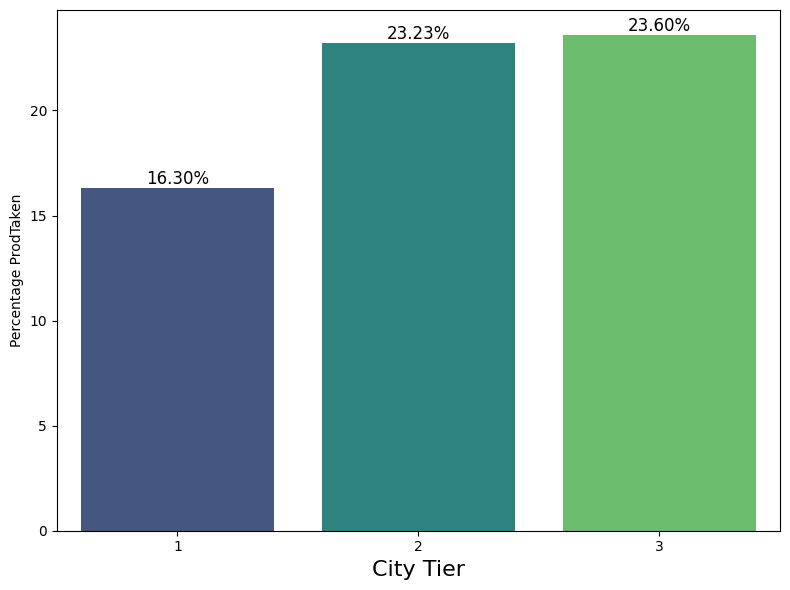

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CityTier', y='Persen', data=df_citytier, palette='viridis')
plt.title('')
plt.xlabel('City Tier', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_citytier.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Insight

tingkat konversi, atau persentase pelanggan yang telah mengambil produk, ternyata lebih tinggi di CityTier 3 (23.60%) dan CityTier 2 (23.23%) meskipun jumlah pelanggannya lebih sedikit dibandingkan dengan CityTier 1 (16.30%) yang memiliki jumlah pelanggan terbanyak. Hal ini menunjukkan bahwa meskipun jumlah pelanggan bisa lebih sedikit, tingkat konversi yang lebih tinggi di CityTier 3 dan 2 bisa menjadi peluang yang menarik dalam strategi pemasaran, mungkin dengan fokus lebih lanjut pada profil atau preferensi pelanggan di tingkat kota tersebut.

#### Apakah Customers yang memiliki passport lebih tertarik mengambil paket perjalanan?

In [ ]:
df_passport = df_eda.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(df_eda.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['Persen']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken==1].sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_passport

,Passport,ProdTaken,CustomerID_x,CustomerID_y,Persen
0,1,1,494,1422,34.74
1,0,1,426,3466,12.29


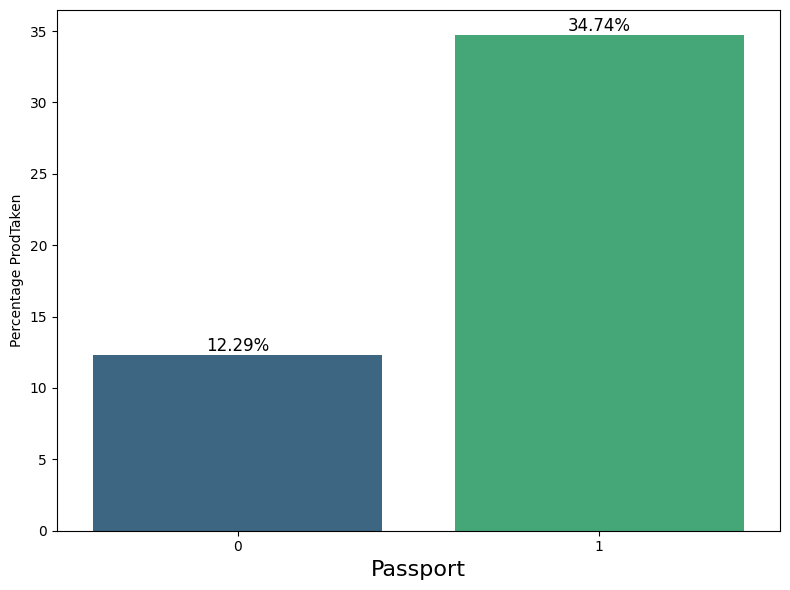

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Passport', y='Persen', data=df_passport, palette='viridis')
plt.title('')
plt.xlabel('Passport', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_passport.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Insight:

terdapat perbedaan signifikan dalam persentase pelanggan yang telah mengambil produk antara mereka yang memiliki paspor dan yang tidak memiliki. Proporsi pelanggan yang telah mengambil produk jauh lebih tinggi di antara mereka yang memiliki paspor (34.74%) dibandingkan dengan yang tidak memiliki (12.29%). Hal ini bisa menunjukkan adanya korelasi atau pengaruh antara kepemilikan paspor dengan keputusan pelanggan untuk mengambil produk. Namun, perlu analisis lebih lanjut untuk memahami apakah faktor kepemilikan paspor secara langsung memengaruhi keputusan tersebut atau terdapat faktor lain yang turut berperan dalam pengambilan keputusan pelanggan.

#### Segmentasi Umur dan Income apa yang mendominasi di setiap paket perjalanan?

In [ ]:
def segmentasi_income(income):
    if income <= 20346:
        segmentasi = 'Low Income'
    elif 20346 < income <= 25571:
        segmentasi = 'Middle Income'
    else:
        segmentasi = 'High Income'
    return segmentasi

# Menggunakan fungsi apply dengan lambda untuk membuat kolom baru 'segmentasi_income'
df_eda['segmentasi_income'] = df_eda['MonthlyIncome'].apply(segmentasi_income)
df_eda.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_income
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Middle Income
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Low Income
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Low Income
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Low Income
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Low Income


In [ ]:
def segmentasi_umur(age):
    if age <= 14:
        segmentasi = 'Kid'
    elif 15 < age <= 30:
        segmentasi = 'Young'
    elif 30 < age <= 50:
        segmentasi = 'Middle-Aged'
    else:
        segmentasi = 'Senior'
    return segmentasi

# Menggunakan fungsi apply dengan lambda untuk membuat kolom baru 'segmentasi_umur'
df_eda['segmentasi_umur'] = df_eda['Age'].apply(segmentasi_umur)
df_eda.head()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_income,segmentasi_umur
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,Middle Income,Middle-Aged
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Low Income,Middle-Aged
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,Low Income,Middle-Aged
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Low Income,Middle-Aged
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Low Income,Senior


In [ ]:
print(df_prod_taken.columns)

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'segmentasi_income', 'segmentasi_umur'],
      dtype='object')


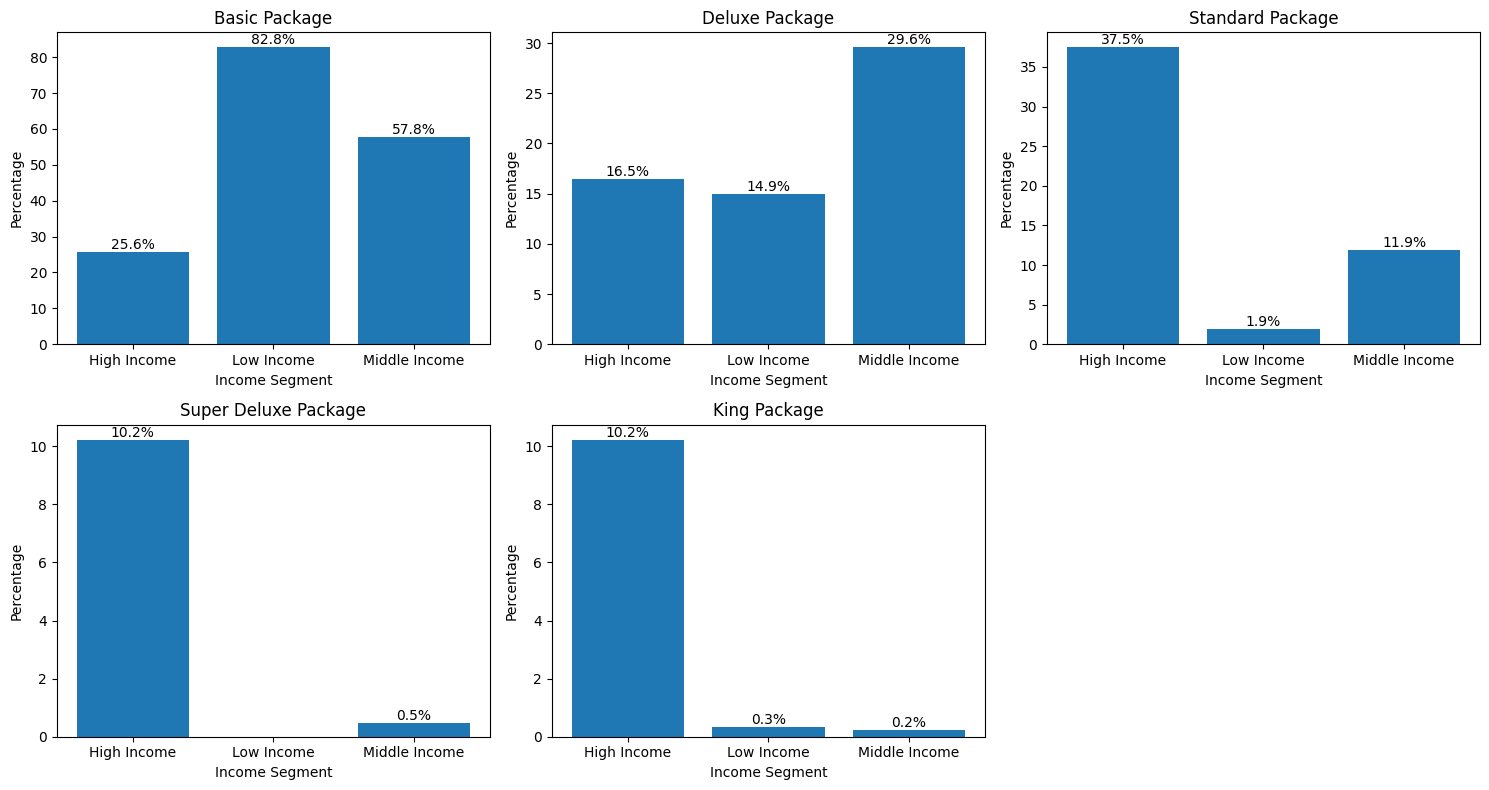

In [ ]:
# Filter data where ProdTaken is 1 (customers who took the product)
df_prod_taken = df_eda[df_eda['ProdTaken'] == 1]

basic_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Basic'].groupby('segmentasi_income').size()
deluxe_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Deluxe'].groupby('segmentasi_income').size()
standard_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Standard'].groupby('segmentasi_income').size()
super_deluxe_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Super Deluxe'].groupby('segmentasi_income').size()
king_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'King'].groupby('segmentasi_income').size()

# Total customers per income segment for ProdTaken == 1
total_by_segment = df_prod_taken.groupby('segmentasi_income').size()

# Calculate percentages for each product and segment for ProdTaken == 1
basic_perc = (basic_counts / total_by_segment) * 100
deluxe_perc = (deluxe_counts / total_by_segment) * 100
standard_perc = (standard_counts / total_by_segment) * 100
super_deluxe_perc = (super_deluxe_counts / total_by_segment) * 100
king_perc = (king_counts / total_by_segment) * 100

# Set up plot dimensions
plt.figure(figsize=(15, 8))

# Bar chart for Basic Package
plt.subplot(2, 3, 1)
bars = plt.bar(basic_perc.index, basic_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('Basic Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Deluxe Package
plt.subplot(2, 3, 2)
bars = plt.bar(deluxe_perc.index, deluxe_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('Deluxe Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Standard Package
plt.subplot(2, 3, 3)
bars = plt.bar(standard_perc.index, standard_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('Standard Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Super Deluxe Package
plt.subplot(2, 3, 4)
bars = plt.bar(super_deluxe_perc.index, super_deluxe_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('Super Deluxe Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for King Package
plt.subplot(2, 3, 5)
bars = plt.bar(king_perc.index, king_perc.values)
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.title('King Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dilihat dari diagram batang, dapat diambil kesimpulan bahwa setiap paket memiliki segment pasar (khususnya dalam income) sesuai dengan harga paket tersebut. Paket termurah yaitu Basic didominasi oleh pelanggan dengan low income. Paket menengah yaitu Deluxe didominasi dengan pelanggan dengan middle income. Paket menengah ke termahal yaitu paket Standard, Super Deluxe, dan King didominasi oleh pelanggan dengan high income.

Dikarenakan paket baru yang akan ditawarkan merupakan paket yang berfokus pada kesehatan yaitu paket Wellness Tourism dan dengan biaya/tarif yang lebih mahal dibandingkan dengan paket King, sehingga ke depannya pemasaran paket paker Wellness Tourism bisa didasarkan oleh segmentasi income dari King Package.

In [ ]:
# baru yang sebelumnya
# # Filter data where ProdTaken is 1 (customers who took the product)
# df_prod_taken = df_eda[df_eda['ProdTaken'] == 1]

# # Count the occurrences of each income segment for each product for ProdTaken == 1
# basic_counts = df_prod_taken.groupby('segmentasi_income')['ProductPitched_Basic'].sum() # Corrected typo 'ProductPitched_Basic'
# deluxe_counts = df_prod_taken.groupby('segmentasi_income')['ProductPitched_Deluxe'].sum()
# standard_counts = df_prod_taken.groupby('segmentasi_income')['ProductPitched_Standard'].sum()
# super_deluxe_counts = df_prod_taken.groupby('segmentasi_income')['ProductPitched_Super Deluxe'].sum()
# king_counts = df_prod_taken.groupby('segmentasi_income')['ProductPitched_King'].sum()

# # Total customers per income segment for ProdTaken == 1
# total_by_segment = df_prod_taken.groupby('segmentasi_income').size()

# # Calculate percentages for each product and segment for ProdTaken == 1
# basic_perc = (basic_counts / total_by_segment) * 100
# deluxe_perc = (deluxe_counts / total_by_segment) * 100
# standard_perc = (standard_counts / total_by_segment) * 100
# super_deluxe_perc = (super_deluxe_counts / total_by_segment) * 100
# king_perc = (king_counts / total_by_segment) * 100

# # Set up plot dimensions
# plt.figure(figsize=(15, 8))

# # Bar chart for Basic Package
# plt.subplot(2, 3, 1)
# bars = plt.bar(basic_perc.index, basic_perc.values)
# plt.xlabel('Income Segment')
# plt.ylabel('Percentage')
# plt.title('Basic Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# # Bar chart for Deluxe Package
# plt.subplot(2, 3, 2)
# bars = plt.bar(deluxe_perc.index, deluxe_perc.values)
# plt.xlabel('Income Segment')
# plt.ylabel('Percentage')
# plt.title('Deluxe Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# # Bar chart for Standard Package
# plt.subplot(2, 3, 3)
# bars = plt.bar(standard_perc.index, standard_perc.values)
# plt.xlabel('Income Segment')
# plt.ylabel('Percentage')
# plt.title('Standard Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# # Bar chart for Super Deluxe Package
# plt.subplot(2, 3, 4)
# bars = plt.bar(super_deluxe_perc.index, super_deluxe_perc.values)
# plt.xlabel('Income Segment')
# plt.ylabel('Percentage')
# plt.title('Super Deluxe Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# # Bar chart for King Package
# plt.subplot(2, 3, 5)
# bars = plt.bar(king_perc.index, king_perc.values)
# plt.xlabel('Income Segment')
# plt.ylabel('Percentage')
# plt.title('King Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# plt.tight_layout()
# plt.show()

## segmentasi umur

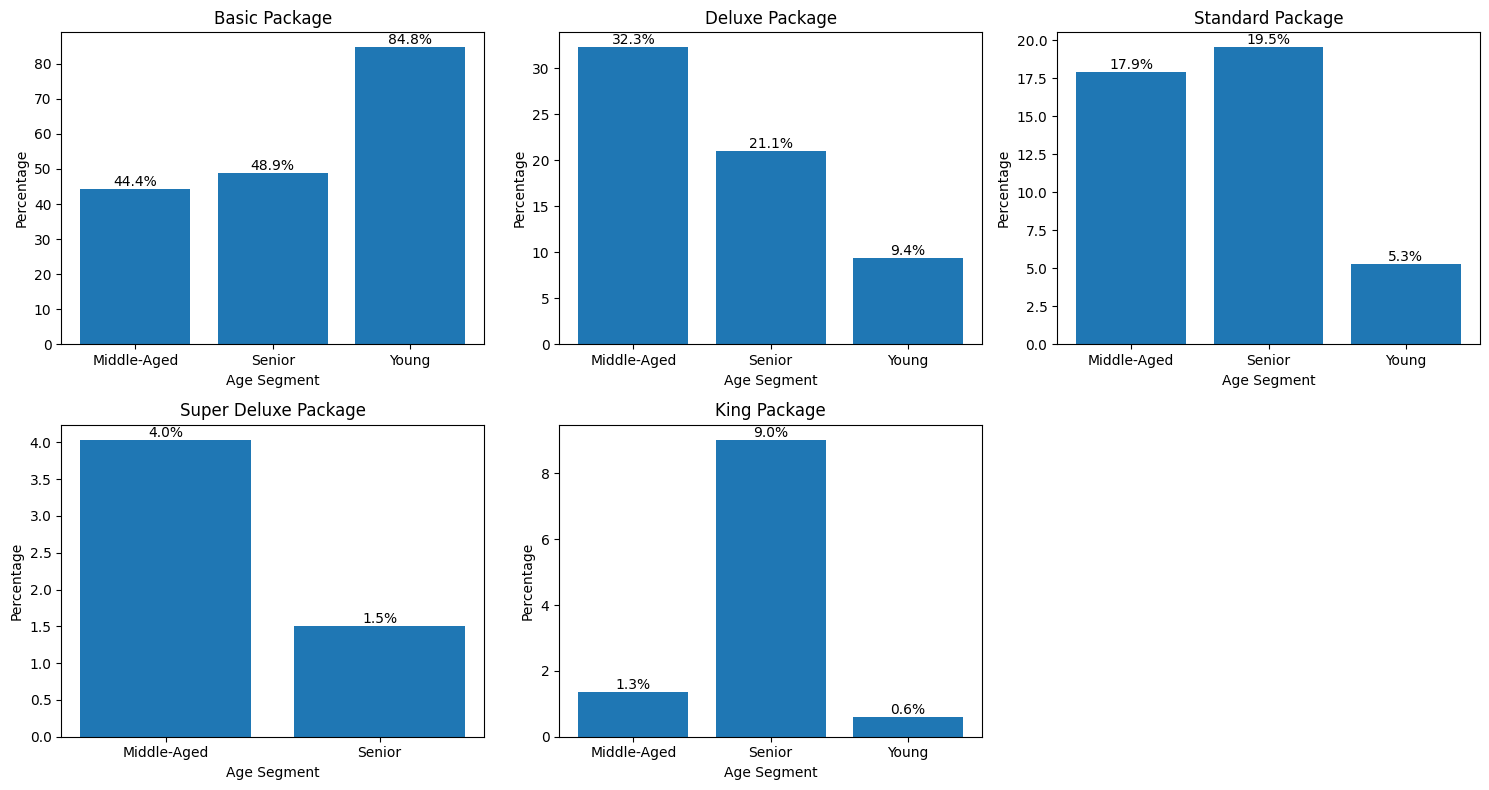

In [ ]:
# Filter data where ProdTaken is 1 (customers who took the product)
df_prod_taken = df_eda[df_eda['ProdTaken'] == 1]

# Count the occurrences of each age segment for each product
basic_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Basic'].groupby('segmentasi_umur').size()
deluxe_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Deluxe'].groupby('segmentasi_umur').size()
standard_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Standard'].groupby('segmentasi_umur').size()
super_deluxe_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'Super Deluxe'].groupby('segmentasi_umur').size()
king_counts = df_prod_taken[df_prod_taken['ProductPitched'] == 'King'].groupby('segmentasi_umur').size()

# Total customers per age segment
total_by_age_segment = df_prod_taken.groupby('segmentasi_umur').size()

# Calculate percentages for each product and segment
basic_perc = (basic_counts / total_by_age_segment) * 100
deluxe_perc = (deluxe_counts / total_by_age_segment) * 100
standard_perc = (standard_counts / total_by_age_segment) * 100
super_deluxe_perc = (super_deluxe_counts / total_by_age_segment) * 100
king_perc = (king_counts / total_by_age_segment) * 100

# Set up plot dimensions
plt.figure(figsize=(15, 8))

# Bar chart for Basic Package
plt.subplot(2, 3, 1)
bars = plt.bar(basic_perc.index, basic_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('Basic Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Deluxe Package
plt.subplot(2, 3, 2)
bars = plt.bar(deluxe_perc.index, deluxe_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('Deluxe Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Standard Package
plt.subplot(2, 3, 3)
bars = plt.bar(standard_perc.index, standard_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('Standard Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for Super Deluxe Package
plt.subplot(2, 3, 4)
bars = plt.bar(super_deluxe_perc.index, super_deluxe_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('Super Deluxe Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Bar chart for King Package
plt.subplot(2, 3, 5)
bars = plt.bar(king_perc.index, king_perc.values)
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.title('King Package')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dilihat dari diagram batang, paket Basic didominasi oleh anak muda dan orang tua, sedangkan paket Deluxe dan Super Deluxe didominasi oleh umur menengah, dan paket Standard dan Paket King didominasi oleh orang tua. Jika pemasaran paket Wellness Toursim mengacu pada paket King, maka segmentasi umur yang sesuai adalah orang tua berumur 50 tahun ke atas dengan high income.


In [ ]:
# code sebelumnya terdapat error pada penamaan
 # Filter data where ProdTaken is 1 (customers who took the product)
# df_prod_taken = df_eda[df_eda['ProdTaken'] == 1]

# # Count the occurrences of each age segment for each product
# basic_counts = df_prod_taken.groupby('segmentasi_umur')['ProductPitched_Basic'].sum()
# deluxe_counts = df_prod_taken.groupby('segmentasi_umur')['ProductPitched_Deluxe'].sum()
# standard_counts = df_prod_taken.groupby('segmentasi_umur')['ProductPitched_Standard'].sum()
# super_deluxe_counts = df_prod_taken.groupby('segmentasi_umur')['ProductPitched_Super Deluxe'].sum()
# king_counts = df_prod_taken.groupby('segmentasi_umur')['ProductPitched_King'].sum()

# # Total customers per age segment
# total_by_age_segment = df_prod_taken.groupby('segmentasi_umur').size()

# # Calculate percentages for each product and segment
# basic_perc = (basic_counts / total_by_age_segment) * 100
# deluxe_perc = (deluxe_counts / total_by_age_segment) * 100
# standard_perc = (standard_counts / total_by_age_segment) * 100
# super_deluxe_perc = (super_deluxe_counts / total_by_age_segment) * 100
# king_perc = (king_counts / total_by_age_segment) * 100

# # Set up plot dimensions
# plt.figure(figsize=(15, 8))

# # Bar chart for Basic Package
# plt.subplot(2, 3, 1)
# bars = plt.bar(basic_perc.index, basic_perc.values)
# plt.xlabel('Age Segment')
# plt.ylabel('Percentage')
# plt.title('Basic Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# # Bar chart for Deluxe Package
# plt.subplot(2, 3, 2)
# bars = plt.bar(deluxe_perc.index, deluxe_perc.values)
# plt.xlabel('Age Segment')
# plt.ylabel('Percentage')
# plt.title('Deluxe Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# # Bar chart for Standard Package
# plt.subplot(2, 3, 3)
# bars = plt.bar(standard_perc.index, standard_perc.values)
# plt.xlabel('Age Segment')
# plt.ylabel('Percentage')
# plt.title('Standard Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# # Bar chart for Super Deluxe Package
# plt.subplot(2, 3, 4)
# bars = plt.bar(super_deluxe_perc.index, super_deluxe_perc.values)
# plt.xlabel('Age Segment')
# plt.ylabel('Percentage')
# plt.title('Super Deluxe Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# # Bar chart for King Package
# plt.subplot(2, 3, 5)
# bars = plt.bar(king_perc.index, king_perc.values)
# plt.xlabel('Age Segment')
# plt.ylabel('Percentage')
# plt.title('King Package')

# # Add percentage labels
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# plt.tight_layout()
# plt.show()
